In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

In [2]:
save_dir = (
    '/Users/greg/Dropbox (HMS)/Baker_QC_2021/script_output/last_minute_figures'
    '/cluster_redistribution'
)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

raw = pd.read_parquet(
    '/Users/greg/Dropbox (HMS)/topacio/cylinter_output/TOPACIO_FINAL/' +
    'output_raw/checkpoints/clustering.parquet'
)

clean = pd.read_parquet(
    '/Users/greg/Dropbox (HMS)/topacio/cylinter_output/TOPACIO_FINAL/' +
    'output_orig/checkpoints/clustering.parquet'
)

clean['handle'] = clean['Sample'] + '_' + clean['CellID'].astype(str)

cois = [415, 404, 424, 174, 272]

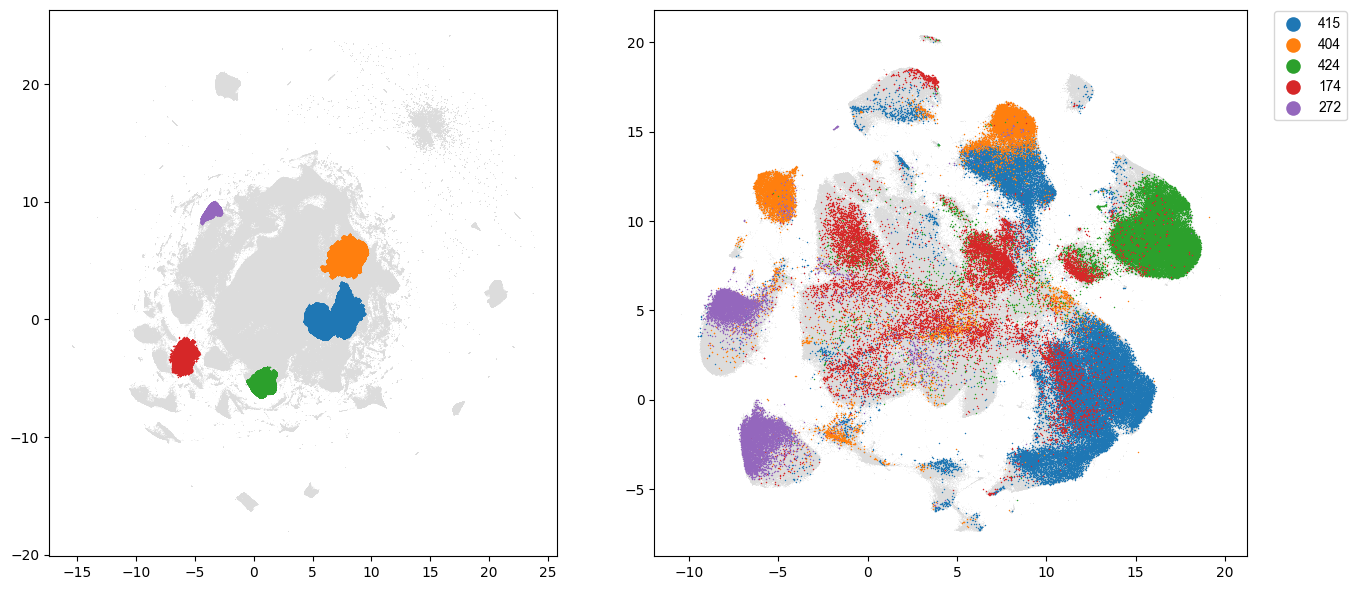

In [3]:
# fig, axs = plt.subplots(1, 2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# pre-QC
ax1.scatter(
    raw['emb1'], raw['emb2'], c='gainsboro', s=0.05, linewidth=0.0
)
ax1.set_aspect('equal', adjustable='box')

# post-QC
plt.scatter(
    clean['emb1'], clean['emb2'], c='gainsboro', s=0.05, linewidth=0.0
)
ax2.set_aspect('equal', adjustable='box')

for clus in cois:
    test = raw[['Sample', 'CellID']][raw['cluster_2d'] == clus]
    ids = test['Sample'] + '_' + test['CellID'].astype(str)
    res = clean[clean['handle'].isin(ids)]
    ax1.scatter(
        raw['emb1'][raw['cluster_2d'] == clus], raw['emb2'][raw['cluster_2d'] == clus],
        s=1.1, linewidth=0.0, label=clus
    )
    ax2.scatter(
        res['emb1'], res['emb2'], s=1.1, linewidth=0.0, label=clus
    )

font = font_manager.FontProperties(family='Arial')
plt.legend(prop=font, bbox_to_anchor=[1.18, 1.01], markerscale=10)
plt.tight_layout()

plt.savefig(os.path.join(save_dir, 'cluster_redist.png'), dpi=800)
plt.show()
plt.close('all')